In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import mubind as mb
import numpy as np
import pandas as pd
import torch
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = '/home/johanna/ICB/annotations'
# mb.models.MultiBind
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import logomaker

# Use a GPU if available, as it should be faster.
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = 'cpu'
print("Using device: " + str(device))

Using device: cpu


In [39]:
n_rounds = 1
data = pd.read_csv('../data/countTable.0.CTCF_r3.tsv.gz', sep='\t', header=None)
data.columns = ['seq'] + [i for i in range(n_rounds+1)]
# data = data.sample(n=1000)
# data.index = range(len(data))
dataset = mb.datasets.SelexDataset(data, n_rounds=n_rounds)
train = tdata.DataLoader(dataset=dataset, batch_size=128, shuffle=True)
# train_test = tdata.DataLoader(dataset=dataset, batch_size=1, shuffle=False)

In [40]:
model = mb.models.DinucSelex(use_dinuc=False, kernels=[0, 14, 12], n_rounds=1, n_batches=1).to(device)
l2 = []
optimiser = topti.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
# optimiser = topti.LBFGS(model.parameters())
criterion = mb.tl.PoissonLoss()

final loss tensor(1928.5901)
R^2: -225.33655880924417


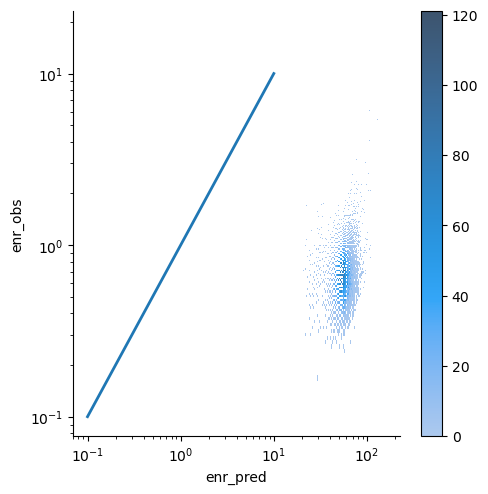

In [41]:
mb.pl.kmer_enrichment(model, train, k=8)

In [42]:
mb.tl.train_network(model, train, device, optimiser, criterion, num_epochs=500, early_stopping=10, log_each=10)

optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.001
weight_decay= 0.0001
dir weight 0
Epoch:  1, Loss: 1.041729 , best epoch: -1 secs per epoch: 5.497 s
Epoch: 11, Loss: 0.836835 , best epoch: 9 secs per epoch: 7.457 s
Epoch: 21, Loss: 0.828077 , best epoch: 19 secs per epoch: 6.883 s
Epoch: 31, Loss: 0.827934 , best epoch: 29 secs per epoch: 6.765 s
Epoch: 41, Loss: 0.827865 , best epoch: 37 secs per epoch: 6.783 s
Epoch: 51, Loss: 0.827818 , best epoch: 43 secs per epoch: 6.654 s
Epoch: 61, Loss: 0.827770 , best epoch: 58 secs per epoch: 6.563 s
Epoch: 71, Loss: 0.827670 , best epoch: 67 secs per epoch: 6.505 s
Epoch: 81, Loss: 0.827591 , best epoch: 79 secs per epoch: 6.524 s
Epoch: 91, Loss: 0.827550 , best epoch: 84 secs per epoch: 6.486 s
Epoch: 101, Loss: 0.827495 , best epoch: 99 secs per epoch: 6.467 s
Epoch: 111, Loss: 0.827374 , best epoch: 108 secs per epoch: 6.421 s
Epoch: 121, Loss: 0.827123 , best epoch: 118 secs per epo

final loss tensor(776.1093)
R^2: 0.2849154898559143


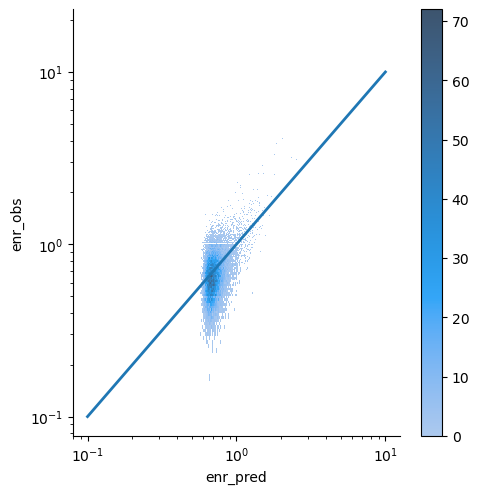

In [43]:
mb.pl.kmer_enrichment(model, train, k=8)


#activities
[[[1.0000037  1.3113006 ]
  [1.0000277  0.26053813]
  [1.0001043  0.520664  ]]]

#log_etas
Parameter containing:
tensor([[ 1.3916, -1.3916]], requires_grad=True)


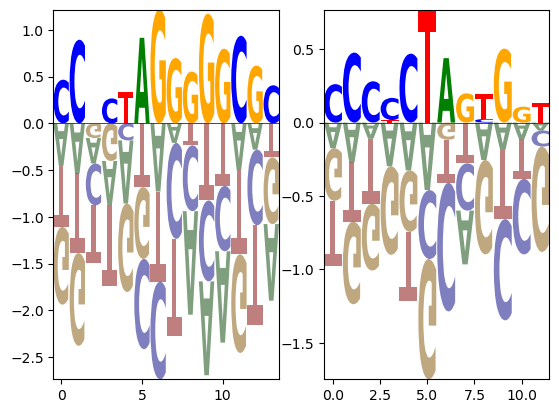

In [44]:
mb.pl.conv_mono(model)